In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import stanza
from spellchecker import SpellChecker
from nltk.corpus import words
import zemberek
from zemberek.morphology import TurkishMorphology
from zemberek.tokenization import TurkishTokenizer
from zemberek.normalization import TurkishSpellChecker
from zemberek.normalization import  TurkishSentenceNormalizer
import jpype
import jpype.imports
from jpype.types import JString

c:\Users\Enes\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# READ DATA

In [4]:
df = pd.read_csv('../data/tweets.csv')
df.head()

Date                                              Tweet
0  08.02.2023  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...
1  08.02.2023  Allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem
2  08.02.2023  Replying to \n@haluklevent\n @danlabilic\n and...
3  08.02.2023       Tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem
4  08.02.2023  ARKADA≈ûIMIZA ULA≈ûAMIYORUZ\nKahramanmara≈ü Elbis...

# CHECK DATA

In [5]:
def checkData(data):
    print("****************SHAPE****************")
    print(data.shape)
    print("****************COLUMNS****************")
    print(data.columns)
    print("****************DTYPES****************")
    print(data.dtypes)    
    print("****************HEAD****************")
    print(data.head())
    print("****************Tail****************")
    print(data.tail())
    print("****************NA****************")
    print(data.isnull().sum())
    print("****************INFO****************")
    print(data.info())

checkData(df)

****************SHAPE****************
(945070, 2)
****************COLUMNS****************
Index(['Date', 'Tweet'], dtype='object')
****************DTYPES****************
Date     object
Tweet    object
dtype: object
****************HEAD****************
         Date                                              Tweet
0  08.02.2023  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...
1  08.02.2023  Allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem
2  08.02.2023  Replying to \n@haluklevent\n @danlabilic\n and...
3  08.02.2023       Tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem
4  08.02.2023  ARKADA≈ûIMIZA ULA≈ûAMIYORUZ\nKahramanmara≈ü Elbis...
****************Tail****************
              Date                                              Tweet
945065  10.02.2023  HALA UMUT VAR BELKƒ∞ RT YAPTIK BELKƒ∞ YAPMADIK A...
945066  10.02.2023  Can can deyu s√∂ylerlerdi‚Ä¶Ben can nedir ≈üimdi b...
945067  10.02.2023  Deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...
945068  10.02.2023

# Drop Duplicate & Nan

In [8]:
df = df.drop_duplicates(subset=["Tweet"], keep="first").reset_index(drop=True)
df = df.dropna(subset=["Tweet"]).reset_index(drop=True)
checkData(df)

****************SHAPE****************
(875904, 2)
****************COLUMNS****************
Index(['Date', 'Tweet'], dtype='object')
****************DTYPES****************
Date     object
Tweet    object
dtype: object
****************HEAD****************
         Date                                              Tweet
0  08.02.2023  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...
1  08.02.2023  Allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem
2  08.02.2023  Replying to \n@haluklevent\n @danlabilic\n and...
3  08.02.2023       Tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem
4  08.02.2023  ARKADA≈ûIMIZA ULA≈ûAMIYORUZ\nKahramanmara≈ü Elbis...
****************Tail****************
              Date                                              Tweet
875899  10.02.2023     OBƒ∞LET DEPREM B√ñLGELERƒ∞NDEN √úCRETSƒ∞Z TAHLƒ∞Y...
875900  10.02.2023  Anne ve 6 Aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...
875901  10.02.2023  Can can deyu s√∂ylerlerdi‚Ä¶Ben can nedir ≈üimdi b...
875902  10.02.2023

# Tweets Lower And Conver Str

In [9]:
df['Tweet'] = df['Tweet'].astype(str)
df['Tweet'] = df['Tweet'].str.lower()

In [10]:
df['lower'] = df['Tweet'].astype(str).str.lower()
df[['Tweet','lower']].head()

Tweet  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                               lower  
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...  
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem  
2  replying to \n@haluklevent\n @danlabilic\n and...  
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem  
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...

# Count By Tweet Date

In [12]:
tweet_counts = df.groupby('Date')['Tweet'].count().sort_values(ascending=False)
print("=== Tweet Counts by Date ===")
print(tweet_counts)

=== Tweet Counts by Date ===
Date
06.02.2023    465560
07.02.2023    196001
08.02.2023     97372
09.02.2023     71622
10.02.2023     45349
Name: Tweet, dtype: int64


# Hashtags

In [13]:
hashtag_counts = df['Tweet'].str.findall(r'#\w+').explode().value_counts()
print("=== Hashtag Counts ===")
print(hashtag_counts)

=== Hashtag Counts ===
Tweet
#deprem                 2509
#hatay                   400
#hatayyardimbekliyor     194
#depremsondakika         185
#afad                    164
                        ... 
#bursa                     1
#g√∂kberkdemirci            1
#erdbeben                  1
#helpturkiye               1
#o                         1
Name: count, Length: 836, dtype: int64


# Word Cloud Hashtags

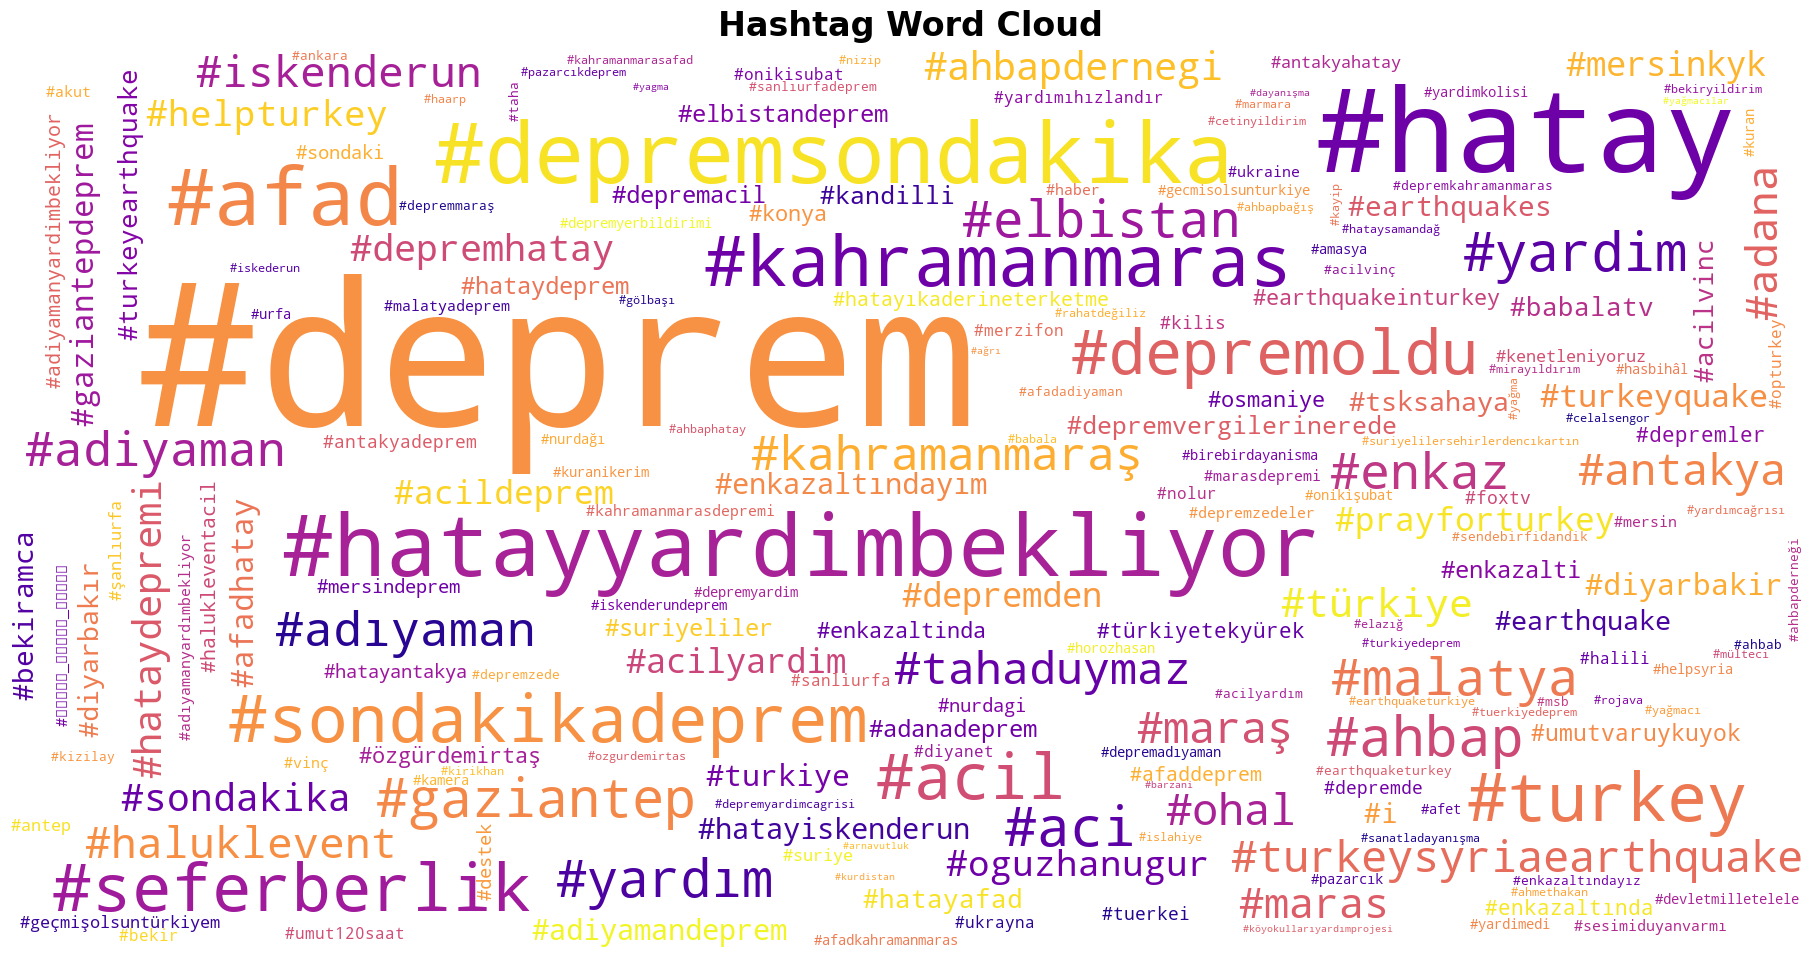

In [14]:
hashtag_dict = hashtag_counts.to_dict()
wordcloud = WordCloud(
    width=1800,
    height=900,
    background_color='white',       
    min_font_size=10,
    max_font_size=200,
    colormap='plasma',              
    contour_color='steelblue',       
    contour_width=1.5               
).generate_from_frequencies(hashtag_dict)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud', fontsize=24, fontweight='bold', pad=10)
plt.tight_layout(pad=0)
plt.show()

# Remove @ mentions and hyperlinks

In [16]:
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9]+', '', text)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'www\S+', '', text)   
    return text

df['content_ment_link'] = df['Tweet'].apply(lambda x: remove_mentions(x))
df['content_ment_link'] = df['content_ment_link'].apply(lambda x: remove_urls(x))
df.head()

Date                                              Tweet  \
0  08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3  08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                               lower  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...  
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem  
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...  
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem  
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...

## Removal of Punctuations

In [17]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['content_wo_punct'] = df['content_ment_link'].apply(lambda x: remove_punctuation(x))
df['content_wo_punct'] = df['content_wo_punct'].str.replace('\n', ' ', regex=False)
df.head()

Date                                              Tweet  \
0  08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3  08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                               lower  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...  
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem  
2  replying to      and  harun adƒ±yamanda ali ta≈ü...  
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem  
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...

## Remove Emojies & Numbers

In [18]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
remove_emoji("game is on üî•üî•")

'game is on '

In [19]:
def remove_numbers(text):
    return re.sub(r'[0-9]+', '', text)

df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_emoji(x))
df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_numbers(x))
df.head()

Date                                              Tweet  \
0  08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3  08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                               lower  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...  
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem  
2  replying to      and  harun adƒ±yamanda ali ta≈ü...  
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem  
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...

In [20]:
df.to_csv("xx.csv")

# Remove English Words

In [21]:
nltk.download("words")
english_words = set(words.words())
english_words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Enes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'harmonicism',
 'monoecious',
 'multurer',
 'overconsume',
 'pigmentose',
 'Graphophone',
 'Kaimo',
 'casuistess',
 'corder',
 'coagulase',
 'successfully',
 'colymbion',
 'banzai',
 'jut',
 'phlebectasy',
 'rudimental',
 'inofficiosity',
 'scaw',
 'julienite',
 'supersensible',
 'caulotaxy',
 'scientificogeographical',
 'Lagorchestes',
 'cuprotungstite',
 'withdrawal',
 'Stylaster',
 'meriah',
 'unhindering',
 'levitational',
 'singspiel',
 'acomia',
 'valuable',
 'chloroplast',
 'excrescency',
 'capitalist',
 'dicatalectic',
 'isographical',
 'theatral',
 'soldier',
 'betulinol',
 'asthorin',
 'intranarial',
 'locky',
 'secondary',
 'subdeb',
 'tangential',
 'templed',
 'boggart',
 'follicular',
 'nonfatal',
 'undetectible',
 'enterocentesis',
 'fireboy',
 'nonexteriority',
 'angula',
 'abreast',
 'trunkfish',
 'Anthomyiidae',
 'intervener',
 'creeky',
 'erminites',
 'misworship',
 'unavoidable',
 'slowworm',
 'vitrifiability',
 'czarship',
 'meaningless',
 'multiflorous',
 'ostensi

In [22]:
def remove_english_words(text):
    return " ".join([word for word in text.split() if word.lower() not in english_words])

df["content_wo_removed_english"] = df["content_wo_punct"].apply(lambda text: remove_english_words(text))
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\breplying\b", "", case=False, regex=True)
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\bshow more\b", "", case=False, regex=True)
df.head()

Date                                              Tweet  \
0  08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3  08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                               lower  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2  replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                          content_wo_removed_english  
0  hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem  
1       allahƒ±m nolur onlara dayanma g√ºc√º ver deprem  
2   harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...  
3                    tuƒüba s√∂dekoƒülu kovulsun deprem  
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...

## Sentence Normalization

In [23]:
morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)

2024-11-29 00:08:08,472 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 9.75762391090393



In [24]:
examples = ["Yrn okua gidecem",
            "Tmm, yarin havuza giricem ve aksama kadar yaticam :)",
            "ah aynen ya annemde fark ettƒ± siz evinizden cƒ±kmayƒ±n diyo",
            "gercek mƒ± bu? Yuh! Artƒ±k unutulmasƒ± bile beklenmiyo",
            "Hayƒ±r hayat tela≈üm olmasa alacam buralarƒ± g√∂kdelen dikicem.",
            "yok hocam kesƒ±nlƒ±kle oyle bir≈üey yok",
            "herseyi soyle hayatƒ±nda olmamasƒ± gerek bence boyle ƒ±nsanlarƒ±n falan baskƒ± yapƒ±yosa",
            "email adresim zemberek_python@loodos.com",
            "Kƒ±redi ba≈üvrusu yapmk istiyrum.",
            "Bankanizin hesp blgilerini ogrenmek istyorm.",
            "yetkli birne ulasmak istiyom.",
            "akaryakit calƒ±sanƒ± olark geldƒ±m."
            ]


for example in examples:
    print(example)
    print(normalizer.normalize(example), "\n") 

Yrn okua gidecem
yarƒ±n okula gideceƒüim 

Tmm, yarin havuza giricem ve aksama kadar yaticam :)
tamam , yarƒ±n havuza gireceƒüim ve ak≈üama kadar yatacaƒüƒ±m :) 

ah aynen ya annemde fark ettƒ± siz evinizden cƒ±kmayƒ±n diyo
ah aynen ya annemde fark etti siz evinizden √ßƒ±kmayƒ±n diyor 

gercek mƒ± bu? Yuh! Artƒ±k unutulmasƒ± bile beklenmiyo
ger√ßek mi bu ? yuh ! artƒ±k unutulmasƒ± bile beklenmiyor 

Hayƒ±r hayat tela≈üm olmasa alacam buralarƒ± g√∂kdelen dikicem.
hayƒ±r hayat tela≈üƒ± olmasa alacaƒüƒ±m buralarƒ± g√∂kdelen dikeceƒüim . 

yok hocam kesƒ±nlƒ±kle oyle bir≈üey yok
yok hocam kesinlikle √∂yle bir ≈üey yok 

herseyi soyle hayatƒ±nda olmamasƒ± gerek bence boyle ƒ±nsanlarƒ±n falan baskƒ± yapƒ±yosa
her≈üeyi s√∂yle hayatƒ±nda olmamasƒ± gerek bence b√∂yle insanlarƒ±n falan baskƒ± yapƒ±yorsa 

email adresim zemberek_python@loodos.com
mail adresim zemberek_python@loodos.com 

Kƒ±redi ba≈üvrusu yapmk istiyrum.
kredi ba≈üvurusu yapmak istiyorum . 

Bankanizin hesp blgilerini ogrenmek is

In [25]:
def sentence_normalize(text):
    try:
        return normalizer.normalize(text)
    except Exception as e:
        print(f"Normalization error for text '{text}': {e}")
        return text  
df["content_wo_normalize"] = df["content_wo_removed_english"].apply(lambda text: sentence_normalize(text))
df.head()

KeyboardInterrupt: 

## Tokenization

In [21]:
tokenizer = TurkishTokenizer.DEFAULT

tokens = tokenizer.tokenize("Saat 12:00.")
for token in tokens:
    print('Content = ', token.content)
    print('Type = ', token.type_.name)
    print('Start = ', token.start)
    print('Stop = ', token.end, '\n')

Content =  Saat
Type =  Word
Start =  0
Stop =  3 

Content =  12:00
Type =  Time
Start =  5
Stop =  9 

Content =  .
Type =  Punctuation
Start =  10
Stop =  10 



In [22]:
tokenizer = TurkishTokenizer.DEFAULT
def tokenize(text):
    try:
        tokens = tokenizer.tokenize(text)
        token_list = [token.content for token in tokens]
        return token_list
    except Exception as e:
        print(f"Tokenization error for text '{text}': {e}")
        return None

In [23]:
df["content_wo_tokenize"] = df["content_wo_normalize"].apply(lambda text: tokenize(text))
df.head()

timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan ≈ûevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ≈ûEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  ùêéÃàùê≥ùê†ùêÆÃàùê´ ùêëùêöùêß     dryghtn2  Feb 8, 2023   

                                             content  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2  replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                          content_wo_removed_english  \
0  hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem   
1       allahƒ±m nolur onlara dayanma g√ºc√º ver deprem   
2   harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...   
3                    tuƒüba s√∂dekoƒülu kovulsun deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                                content_wo_normalize  \
0  hepinizden allah razƒ± olsun iyi ki varsƒ±nƒ±z de...   
1     allahƒ±m ne olur onlara dayanma g√ºc√º ver deprem   
2  harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hicr...   
3                    tuƒüba sodekoƒülu kovulsun deprem   
4  arkada≈üƒ±mƒ±za ula≈üamƒ±yoruz kahramanmara≈ü elbist...   

                                 content_wo_tokenize  
0  [hepinizden, allah, razƒ±, olsun, iyi, ki, vars...  
1  [allahƒ±m, ne, olur, onlara, dayanma, g√ºc√º, ver...  
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...  
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]  
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...

# Remove Stopwords

In [24]:
nltk.download('stopwords')
turkish_stopwords_nltk = stopwords.words('turkish')

custom_stopwords_path = '../data/turkce_stopwords.json'
with open(custom_stopwords_path, 'r', encoding='utf-8') as file:
    custom_stopwords = file.read().splitlines()

custom_stopwords = [word.strip().replace('"', '').replace(',', '') for word in custom_stopwords]
combined_stopwords = list(set(turkish_stopwords_nltk + custom_stopwords))

print("T√ºrk√ße Stopword'ler:")
for word in combined_stopwords:
    print(word)

print(f"\nToplam stopword sayƒ±sƒ±: {len(combined_stopwords)}")

T√ºrk√ße Stopword'ler:
hen√ºz
handiyse
y√ºz√ºnden
√∂ylelikle
≈üeyden
bir√æeyi
kah
demin
birkez
evveli
eƒüer
pek√ße
sadece
daha
√æeyler
kimsecikler
yakƒ±ndan
olup
neresi
a
kezalik
bu
benim
≈£ayet
birazdan
enikonu
sahiden
yetmi≈ü
acaba
nasƒ±lsa
bir√ßok
ister
sizin
herkesin
bir√æey
kim
ger√ßi
edilecek
edecek
}
hakeza
onlarƒ±
kere
hep
doksan
√ßoklarƒ±
biraz
√∂b√ºr
≈üuncacƒ±k
niye
etraflƒ±
bir≈üey
benden
bizcileyin
oluyor
yoluyla
√ßoƒüunca
neyse
iyicene
hele
evvelden
bittabi
≈üundan
tamamen
eƒëer
yakinen
i≈üte
tabii
bunlarƒ±n
√ßokluk
y√ºz
≈üey
b√∂yle
ka√ßƒ±
olsa
iyice
binaen
√∂ylemesine
inen
altmƒ±≈ü
deƒüil
gibilerden
olmadƒ±ƒüƒ±
≈üunu
doƒüru
olursa
herkes
seksen
adeta
√ßoklarƒ±nca
gerek
insermi
kelli
kan√Ωmca
b√∂ylece
ho≈ü
ettiƒüini
dair
mƒ±
{
olur
√ßoƒüun
d√∂rt
≈üeyler
herhangi
k√Ωsaca
≈£u
evvel
milyon
peki
olmasƒ±
≈üurasƒ±
nihayet
kala
bilc√ºmle
yirmi
nas√Ωl
fakat
cuk
yapƒ±lmasƒ±
illa
evvelemirde
nereye
tamam
lakin
belki
sizden
yalnƒ±zca
biz
√∂nceden
hepsi
otuz
yaptƒ±
derakap
gayet
velev

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
STOPWORDS = combined_stopwords
def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word not in STOPWORDS]

df["content_wo_stop"] = df["content_wo_tokenize"].apply(lambda tokens: remove_stopwords_from_tokens(tokens))
df = df.drop_duplicates(subset=["content_wo_tokenize"], keep="first").reset_index(drop=True)
df.head()

timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan ≈ûevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ≈ûEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  ùêéÃàùê≥ùê†ùêÆÃàùê´ ùêëùêöùêß     dryghtn2  Feb 8, 2023   

                                             content  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2  replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                          content_wo_removed_english  \
0  hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem   
1       allahƒ±m nolur onlara dayanma g√ºc√º ver deprem   
2   harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...   
3                    tuƒüba s√∂dekoƒülu kovulsun deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                                content_wo_normalize  \
0  hepinizden allah razƒ± olsun iyi ki varsƒ±nƒ±z de...   
1     allahƒ±m ne olur onlara dayanma g√ºc√º ver deprem   
2  harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hicr...   
3                    tuƒüba sodekoƒülu kovulsun deprem   
4  arkada≈üƒ±mƒ±za ula≈üamƒ±yoruz kahramanmara≈ü elbist...   

                                 content_wo_tokenize  \
0  [hepinizden, allah, razƒ±, olsun, iyi, ki, vars...   
1  [allahƒ±m, ne, olur, onlara, dayanma, g√ºc√º, ver...   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                                     content_wo_stop  
0        [hepinizden, allah, razƒ±, varsƒ±nƒ±z, deprem]  
1      [allahƒ±m, onlara, dayanma, g√ºc√º, ver, deprem]  
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...  
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]  
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...

##  Removal of Frequent words

In [26]:
key_terms = {"deprem", "yardƒ±m"}
cnt = Counter()
for text in df["content_wo_stop"].values:
    for word in text:
        cnt[word] += 1

cnt.most_common(50)

[('deprem', 2188),
 ('yardƒ±m', 570),
 ('hatay', 492),
 ('acil', 357),
 ('enkaz', 285),
 ('kahramanmara≈ü', 229),
 ('afad', 216),
 ('altƒ±nda', 216),
 ('¬∑', 189),
 ('feb', 184),
 ('adƒ±yaman', 177),
 ('mahallesi', 171),
 ('hatayyardƒ±mbekliyor', 171),
 ('depremsondakika', 150),
 ('edin', 118),
 ('antakya', 112),
 ('allah', 107),
 ('seferberlik', 97),
 ('insanlar', 95),
 ('arkada≈ülar', 95),
 ('sokak', 92),
 ('mara≈ü', 92),
 ('saat', 92),
 ('haber', 91),
 ('ahbap', 90),
 ('yayalƒ±m', 89),
 ('t√ºrkiye', 87),
 ('‚Ä¶', 85),
 ('ses', 83),
 ('sondakikadeprem', 81),
 ('allahƒ±m', 80),
 ('apartmanƒ±', 80),
 ('elbistan', 79),
 ('mah', 77),
 ('gaziantep', 76),
 ('lazƒ±m', 75),
 ('kurtarma', 74),
 ('caddesi', 73),
 ('destek', 73),
 ('insan', 66),
 ('malatya', 63),
 ('b√ºy√ºk', 62),
 ('gelen', 62),
 ('depremoldu', 60),
 ('geliyor', 60),
 ('artƒ±k', 59),
 ('ki≈üi', 56),
 ('depremden', 56),
 ('vin√ß', 53),
 ('blok', 53)]

In [27]:
def remove(tokens):
    return [token for token in tokens if token not in ['...', '‚Ä¶','¬∑','feb','allah','allahƒ±m','']]

df["content_wo_stop"] = df["content_wo_stop"].apply(remove)

## Lemmatization

In [28]:
def lemmatize_text(text):
    """
    Zemberek kullanarak verilen metni lemmatize eder.
    """
    lemmatized_words = []
    for word in text.split():
        try:
            # Kelimenin analizini al
            analysis = morphology.analyze(word)
            
            # Analiz sonucu varsa
            if analysis and len(analysis.analysis_results) > 0:
                stem = analysis.analysis_results[0].get_stem()
                if stem:
                    lemmatized_words.append(stem)
                else:
                    lemmatized_words.append(word)
            else:
                lemmatized_words.append(word)
                
        except Exception as e:
            print(f"Error analyzing word '{word}': {str(e)}")
            lemmatized_words.append(word)
    return " ".join(lemmatized_words)


try:
    text = "Kitaplarƒ± okuyorum ve bilgilerimi geli≈ütiriyorum."
    lemmatized_text = lemmatize_text(text)
    print("Lemmatized Text:", lemmatized_text)
except Exception as e:
    print(f"Lemmatization failed: {str(e)}")

Lemmatized Text: kitap ok ve bilgi geli≈ütiriyorum.


In [29]:
def lemmatize_tokens(tokens):
    """
    Zemberek kullanarak tokenize edilmi≈ü kelimeleri lemmatize eder.
    """
    lemmatized_words = []
    for word in tokens:
        try:
            # Kelimenin analizini al
            analysis = morphology.analyze(word)
            
            # Analiz sonucu varsa
            if analysis.analysis_results:
                # ƒ∞lk analiz sonucunun k√∂k√ºn√º al
                stem = analysis.analysis_results[0].get_stem()
                if stem:
                    lemmatized_words.append(stem)
                else:
                    lemmatized_words.append(word)
            else:
                lemmatized_words.append(word)
                
        except Exception as e:
            print(f"Error analyzing word '{word}': {str(e)}")
            lemmatized_words.append(word)
    return lemmatized_words


In [30]:
df["content_wo_lemmatized"] = df["content_wo_stop"].apply(lambda tokens: lemmatize_tokens(tokens))
df.head()

timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan ≈ûevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ≈ûEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  ùêéÃàùê≥ùê†ùêÆÃàùê´ ùêëùêöùêß     dryghtn2  Feb 8, 2023   

                                             content  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2  replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                          content_wo_removed_english  \
0  hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem   
1       allahƒ±m nolur onlara dayanma g√ºc√º ver deprem   
2   harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...   
3                    tuƒüba s√∂dekoƒülu kovulsun deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                                content_wo_normalize  \
0  hepinizden allah razƒ± olsun iyi ki varsƒ±nƒ±z de...   
1     allahƒ±m ne olur onlara dayanma g√ºc√º ver deprem   
2  harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hicr...   
3                    tuƒüba sodekoƒülu kovulsun deprem   
4  arkada≈üƒ±mƒ±za ula≈üamƒ±yoruz kahramanmara≈ü elbist...   

                                 content_wo_tokenize  \
0  [hepinizden, allah, razƒ±, olsun, iyi, ki, vars...   
1  [allahƒ±m, ne, olur, onlara, dayanma, g√ºc√º, ver...   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                                     content_wo_stop  \
0               [hepinizden, razƒ±, varsƒ±nƒ±z, deprem]   
1               [onlara, dayanma, g√ºc√º, ver, deprem]   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                               content_wo_lemmatized  
0                           [hep, razƒ±, var, deprem]  
1                       [o, dayan, g√ºc, ver, deprem]  
2  [haru, adƒ±yaman, ali, ta≈üƒ±, mahalle, sokak, hi...  
3                    [tuƒüba, sodekoƒülu, kov, deprem]  
4  [arkada≈ü, ula≈ü, kahramanmara≈ü, elbistan, pƒ±nar...

## Removal of Rare words

In [31]:
cnt = Counter()
for text in df["content_wo_lemmatized"]:
    for word in text:
        cnt[word] += 1

rare_words = [(word, count) for word, count in cnt.items() if count < 10]
print("Rare Words (Fewer than 10 occurrences) and Frequencies:")
for word, count in rare_words:
    print(f"{word}: {count}")

Rare Words (Fewer than 10 occurrences) and Frequencies:
haru: 2
hicret: 3
t√ºlay: 4
arif: 5
beyza: 4
tuƒüba: 4
sodekoƒülu: 1
kov: 1
pƒ±narba≈üƒ±: 7
cemre: 1
√ßoƒüunluƒü: 2
cahil: 1
cesaret: 4
gezi: 1
ko√ß: 5
grub: 4
y√ºzyƒ±l: 4
yeterince: 4
insiyatif: 1
mu: 8
rastla: 1
ikinci: 5
sessiz: 3
tarihyazƒ±yor: 1
helal: 6
kurban: 7
haydi: 6
yor: 6
darkweb: 5
tetik: 4
earthquakes: 7
earthquaketurkey: 3
ssgeos: 1
february: 1
large: 1
aftershocks: 1
readers: 1
predictions: 1
places: 1
faults: 1
fore√ßasts: 1
claims: 1
usgsgovfaqscanyoup: 1
pn≈ünorgoutreachfaqe: 1
scienceexchangecaltechedutopicsearthqu: 1
sitnhmsharvardeduflashpre: 1
usgsgovfaqscanposit: 1
arzu: 6
karaku≈ü: 6
√ßavu≈ü: 5
bahadƒ±r: 1
nizip: 6
yardƒ±m√ßaƒürƒ±sƒ±: 4
antep: 8
cezasisen: 1
mahlukat: 2
tuerkei: 4
sude: 4
biÃá: 7
abla: 9
allahƒ±mdeprem: 1
√∂zdemir: 8
se≈ügeliÃáyor: 2
ahbapacƒ±l: 2
s√∂zle≈ü: 1
nakit: 2
yat: 7
talep: 5
kahramanmarast√ºrkiye: 6
info: 3
dolandƒ±r: 1
ahlak: 8
yakala: 4
dƒ±≈üarƒ±vatanda≈ülƒ±ktan: 1
dram: 1
fƒ±r

In [32]:
rare_words = set([word for word, count in cnt.items() if count < 10])
def remove_rare_words_from_tokens(token_list):
    return [word for word in token_list if word not in rare_words]

df["content_no_rare_words"] = df["content_wo_lemmatized"].apply(remove_rare_words_from_tokens)

# Fix Lemmatize

In [33]:
def fix_tokenization(tokens):
    fixed_tokens = []
    for token in tokens:
        if token == 'yar':
            fixed_tokens.append('yardƒ±m') 
        else:
            fixed_tokens.append(token)
    return fixed_tokens

df['content_no_rare_words'] = df['content_no_rare_words'].apply(lambda x: fix_tokenization(x))


## Word Cloud Cleaned Data

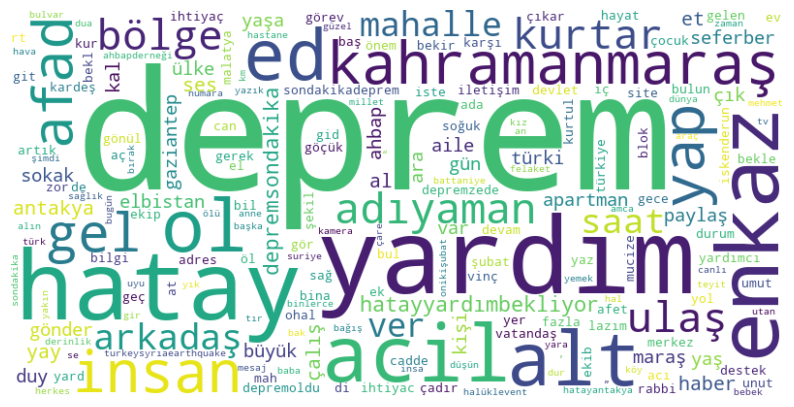

In [34]:
all_words = []
for text in df["content_no_rare_words"]:
    all_words.extend(text)  

word_counts = Counter(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
df.head()

timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan ≈ûevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ≈ûEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  ùêéÃàùê≥ùê†ùêÆÃàùê´ ùêëùêöùêß     dryghtn2  Feb 8, 2023   

                                             content  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2  replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                          content_wo_removed_english  \
0  hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem   
1       allahƒ±m nolur onlara dayanma g√ºc√º ver deprem   
2   harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...   
3                    tuƒüba s√∂dekoƒülu kovulsun deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                                content_wo_normalize  \
0  hepinizden allah razƒ± olsun iyi ki varsƒ±nƒ±z de...   
1     allahƒ±m ne olur onlara dayanma g√ºc√º ver deprem   
2  harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hicr...   
3                    tuƒüba sodekoƒülu kovulsun deprem   
4  arkada≈üƒ±mƒ±za ula≈üamƒ±yoruz kahramanmara≈ü elbist...   

                                 content_wo_tokenize  \
0  [hepinizden, allah, razƒ±, olsun, iyi, ki, vars...   
1  [allahƒ±m, ne, olur, onlara, dayanma, g√ºc√º, ver...   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                                     content_wo_stop  \
0               [hepinizden, razƒ±, varsƒ±nƒ±z, deprem]   
1               [onlara, dayanma, g√ºc√º, ver, deprem]   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                               content_wo_lemmatized  \
0                           [hep, razƒ±, var, deprem]   
1                       [o, dayan, g√ºc, ver, deprem]   
2  [haru, adƒ±yaman, ali, ta≈üƒ±, mahalle, sokak, hi...   
3                    [tuƒüba, sodekoƒülu, kov, deprem]   
4  [arkada≈ü, ula≈ü, kahramanmara≈ü, elbistan, pƒ±nar...   

                               content_no_rare_words  
0                           [hep, razƒ±, var, deprem]  
1                       [o, dayan, g√ºc, ver, deprem]  
2  [adƒ±yaman, ali, ta≈üƒ±, mahalle, sokak, apartman...  
3                                           [deprem]  
4  [arkada≈ü, ula≈ü, kahramanmara≈ü, elbistan, mahal...

In [36]:
df.to_csv('../results/TweetAnalyzeResult.csv', index=False)